# ESA 12: Clustering
## Finding the best k

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
url = 'edlich-kmeans-A0.csv'
data = pd.read_csv(url, error_bad_lines=False)
data.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


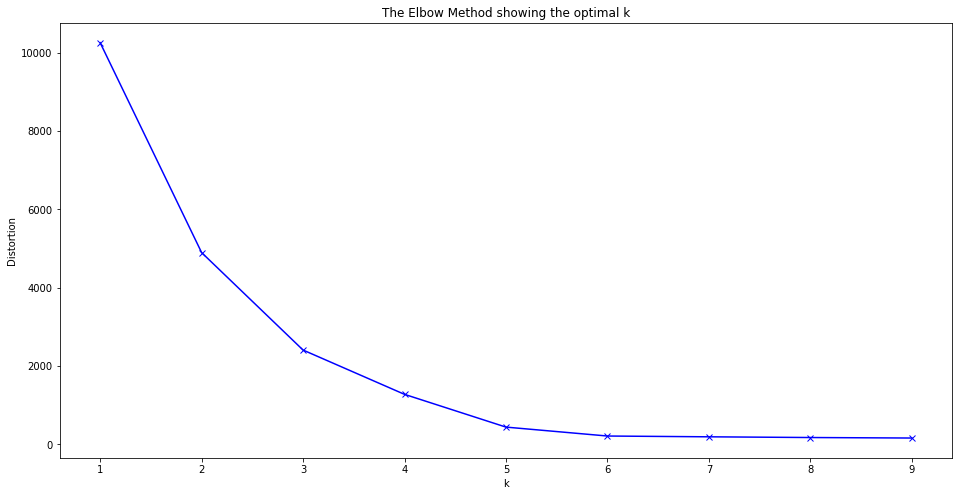

In [9]:
# Fitting the model
# Source: https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

# Plotting the chart
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

By looking at the chart, the best k is 5.

## Clustering vector

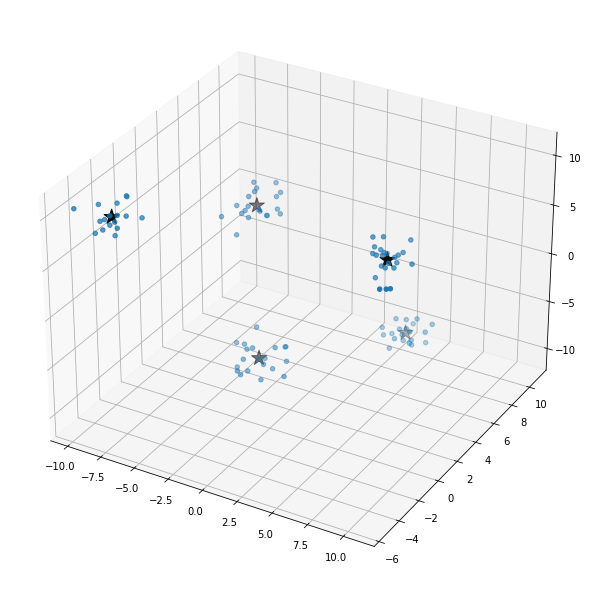

In [26]:
X = np.array(list(zip(data['V1'].values, data['V2'].values, data['V3'].values)))

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(data)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=250)